<a href="https://colab.research.google.com/github/sharon-nasimiyu/Automation-and-Prediction-of-data/blob/main/prediction%20of%20stock%20prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#From here we can see our data has 6 columns:
#Date: The date of recorded data 1. Open: The price when stock market open2.High: The highest price price of date
#3. Low: The lowest price point of date
#4.Volumn: Total Sale of stock on that data
#stock_data = df
from google.colab import files
uploaded = files.upload

   

In [8]:
# importing libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [25]:
#stock_data.head()

In [26]:
stock_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2515,"Mar 20, 2012","7,518.66","7,616.01","7,616.01","7,497.37",826.63M,-1.28%
2516,"Mar 19, 2012","7,616.01","7,615.69","7,658.43","7,590.62",1.01B,0.00%
2517,"Mar 18, 2012","7,615.69","7,600.57","7,617.34","7,555.05",830.26M,0.20%
2518,"Mar 17, 2012","7,600.57","7,567.98","7,623.70","7,553.74",719.91M,0.43%
2519,"Mar 14, 2012","7,567.98","7,521.60","7,587.98","7,521.60",631.59M,0.62%


In [35]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2520 non-null   object
 1   Price     2520 non-null   object
 2   Open      2520 non-null   object
 3   High      2520 non-null   object
 4   Low       2520 non-null   object
 5   Vol.      2520 non-null   object
 6   Change %  2520 non-null   object
dtypes: object(7)
memory usage: 137.9+ KB


In [42]:
import pandas as pd
from google.colab import files
uploaded = files.upload

#df = pd.read_csv("Tadawul.csv")

In [43]:
from google.colab import files
uploaded = files.upload()

Saving Tadawul.csv to Tadawul.csv


In [47]:
df = pd.read_csv('Tadawul.csv')
stock_data = pd.read_csv("../Tadawul.csv")
test_data = pd.read_csv("../Tadawul.csv")

In [48]:
stock_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Apr 14, 2022","13,621.08","13,539.56","13,621.08","13,437.20",201.09M,0.60%
1,"Apr 13, 2022","13,540.27","13,648.97","13,680.02","13,509.50",240.23M,-0.78%
2,"Apr 12, 2022","13,646.12","13,500.72","13,646.12","13,489.47",241.92M,1.21%
3,"Apr 11, 2022","13,483.23","13,412.30","13,511.52","13,399.67",217.59M,0.66%
4,"Apr 10, 2022","13,395.46","13,350.90","13,422.59","13,342.83",169.83M,0.61%


In [49]:
stock_data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2515,"Mar 20, 2012","7,518.66","7,616.01","7,616.01","7,497.37",826.63M,-1.28%
2516,"Mar 19, 2012","7,616.01","7,615.69","7,658.43","7,590.62",1.01B,0.00%
2517,"Mar 18, 2012","7,615.69","7,600.57","7,617.34","7,555.05",830.26M,0.20%
2518,"Mar 17, 2012","7,600.57","7,567.98","7,623.70","7,553.74",719.91M,0.43%
2519,"Mar 14, 2012","7,567.98","7,521.60","7,587.98","7,521.60",631.59M,0.62%


In [56]:
df.columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Close', 'Volume']
df.index.name = "Date"

In [61]:
df['label'] = df['Close']
df = 'Close'

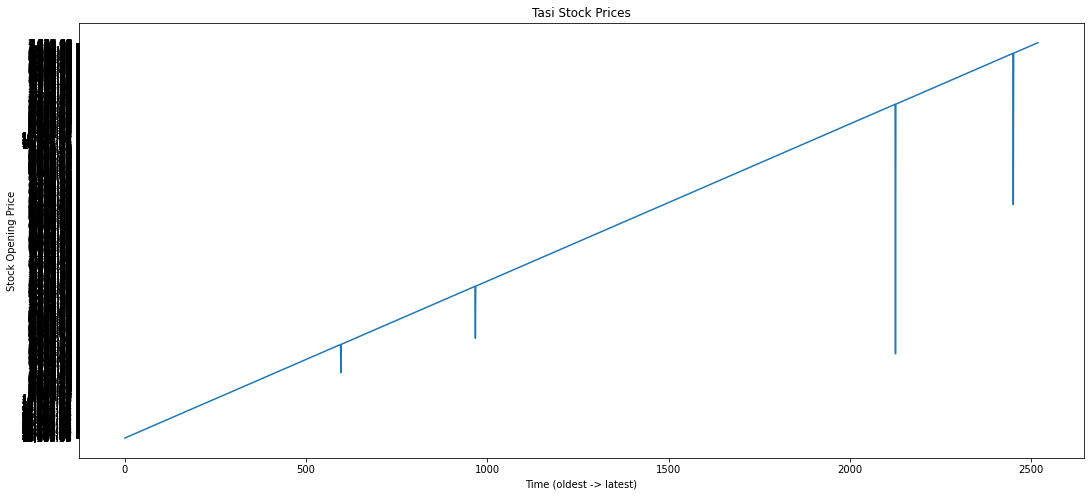

In [64]:
#Virtaulization a. Plotting the Open price
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Open'])
plt.title("Tasi Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Opening Price")
plt.show()

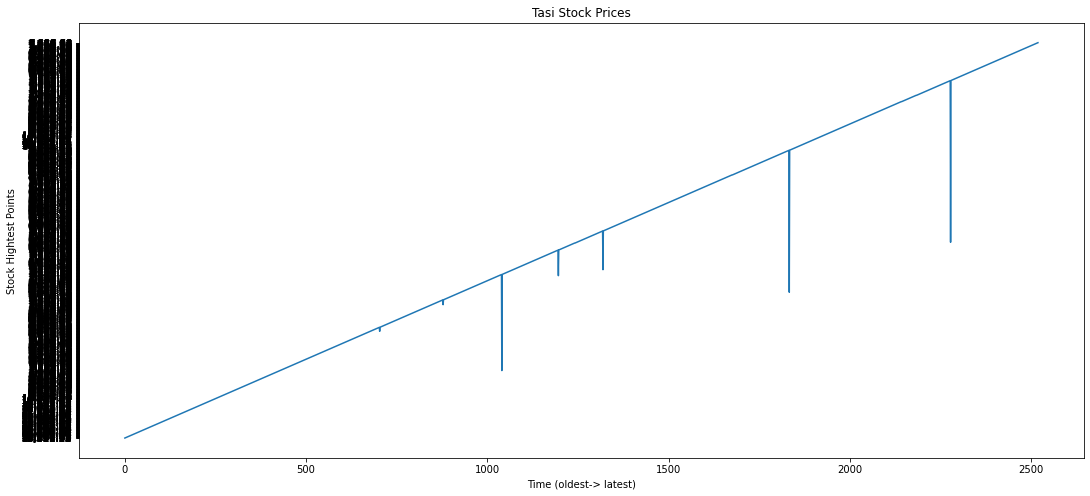

In [65]:
# Plotting the High price
plt.figure(figsize=(18, 8))
plt.plot(stock_data['High'])
plt.title("Tasi Stock Prices")
plt.xlabel("Time (oldest-> latest)")
plt.ylabel("Stock Hightest Points")
plt.show()

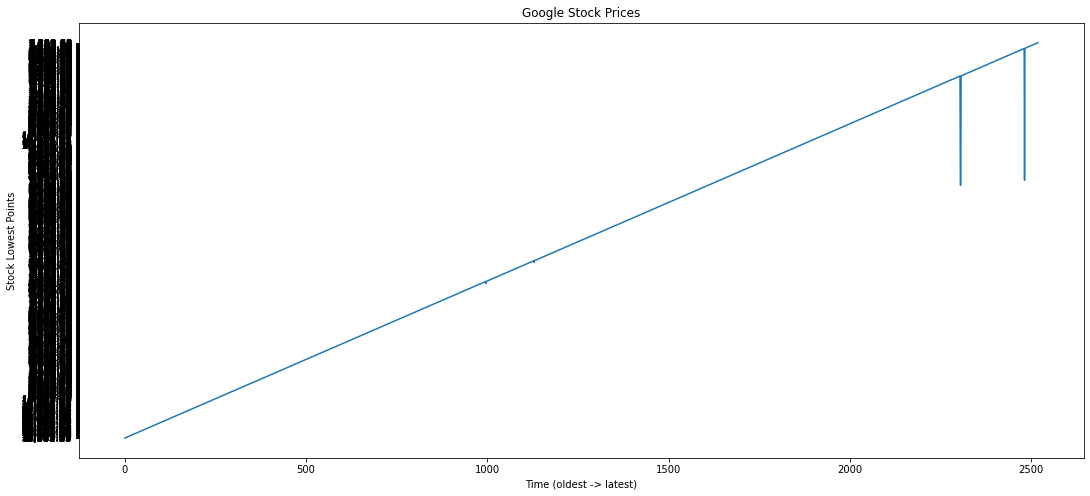

In [66]:
# Plot the Low price
plt.figure(figsize=(18, 8))
plt.plot(stock_data['Low'])
plt.title("Google Stock Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Lowest Points")
plt.show()

In [68]:
#Select feature
#Selecte Open, High, Low, Volumn and Close columns.
#Put close column to the last one as the target.
input_feature = stock_data[['Open', 'High', 'Low']]
input_data = input_feature.values

In [69]:
input_data.shape

(2520, 3)

In [91]:
for i in range(2520, 3):
  float(str(i).replace(",", ""))

In [134]:
scaler = MinMaxScaler(feature_range=(0,10))


In [105]:
#Create data
lookback = 60
total_size = len(stock_data)

In [108]:
X=[]
y=[]
for i in range(0, total_size-lookback): # loop data set with margin 50 as we use 50 days data for prediction
    t=[]
    for j in range(0, lookback): # loop for 50 days
        current_index = i+j
        t.append(input_data[current_index, :]) # get data margin from 50 days with marging i
    X.append(t)
    y.append(input_data[lookback+i, 2])

In [109]:
len(X), len(y)

(2459, 2459)

In [110]:
#Split train, validate and test data
X, y= np.array(X), np.array(y)
X.shape, y.shape

((2459, 60, 3), (2459,))

In [111]:
test_size = 120 

X_test = X[-test_size:]
Y_test = y[-test_size:]

X_rest = X[: -test_size]
y_rest = y[: -test_size]

X_train, X_valid, y_train, y_valid = train_test_split(X_rest, y_rest, test_size = 0.15, random_state = 101)

In [113]:
#Reshape data
X_train = X_train.reshape(X_train.shape[0], lookback, 3)
X_valid = X_valid.reshape(X_valid.shape[0], lookback, 3)
X_test = X_test.reshape(X_test.shape[0], lookback, 3)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1988, 60, 3)
(351, 60, 3)
(120, 60, 3)


In [136]:
#Model creat & fit
#1 Create model
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 3)))
regressor.add(Dropout(rate = 0.1))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.1))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.1))

##add output layer
regressor.add(Dense(units = 1))

In [137]:
#Callbacks: a.EarlyStoping: It will stop the traning if score of model didn't increase,ReduceLROnPlateau: Use for reduce the learning rate and ModelCheckpoint: Use for save model only when the score increased
#callbacks = [
    #EarlyStopping(patience=10, verbose=1),
    #ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    #ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
#]

In [120]:
# regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [132]:
#class ProgramKilled(Exception):
# pass
...
#if __name__ == "__main__":
  #df = pd.DataFrame([])
#df_test.dtypes

Ellipsis

In [142]:
# regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [146]:
regressor.fit(X_train, y_train)

UnimplementedError: ignored